In [158]:
import importlib
import scipy.io
import utils.utils as u 
import utils.preprocessing as p 
# Reload modules to reflect recent changes:
importlib.reload(u)
importlib.reload(p)

<module 'utils.preprocessing' from 'c:\\Users\\josub\\Desktop\\BDMA\\Padova\\Machine Learning\\Proyect\\PROJECT\\src\\utils\\preprocessing.py'>

In [86]:
#THERE ARE TWO DIFFERENT FILE STRUCTURES
#I GUESS WE CAN DROP COLS x AND ans BUT WE SHOULD ASK - THIS IS INTER THING I THINK

mat_data = scipy.io.loadmat("../data/CLA-SubjectJ-170510-3St-LRHand-Inter.mat")
mat_data_1  = scipy.io.loadmat("../data/5F-SubjectA-160405-5St-SGLHand.mat")
print(mat_data.keys())
print(mat_data['o'].dtype)
print(mat_data['ans'].dtype)
print(mat_data['x'].dtype)
print(mat_data_1.keys())
print(mat_data_1['o'].dtype)

dict_keys(['__header__', '__version__', '__globals__', 'ans', 'o', 'x'])
[('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
float64
float64
dict_keys(['__header__', '__version__', '__globals__', 'o'])
[('id', 'O'), ('tag', 'O'), ('sampFreq', 'O'), ('nS', 'O'), ('marker', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]


In [ ]:
import polars as pl
mat_data = scipy.io.loadmat("../data/5F-SubjectA-160405-5St-SGLHand.mat")
o_data = mat_data['o'][0, 0] 
print(o_data.dtype)
print(o_data["id"])
print(o_data["tag"])
print(o_data["nS"])
print(o_data["marker"].shape) #label
print(o_data["data"].shape)
print(o_data["chnames"].shape) #column names
print(o_data["binsuV"])

[('id', 'O'), ('tag', 'O'), ('sampFreq', 'O'), ('nS', 'O'), ('marker', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')]
['201604051923.D091BB44']
['NK-data import (auto)']
[[718600]]
(718600, 1)
(718600, 22)
(22, 1)
[[1]]
Channel names: ["['Fp1']", "['Fp2']", "['F3']", "['F4']", "['C3']", "['C4']", "['P3']", "['P4']", "['O1']", "['O2']", "['A1']", "['A2']", "['F7']", "['F8']", "['T3']", "['T4']", "['T5']", "['T6']", "['Fz']", "['Cz']", "['Pz']", "['X5']"]
shape: (5, 22)
┌─────────┬─────────┬────────┬────────┬───┬────────┬────────┬────────┬────────┐
│ ['Fp1'] ┆ ['Fp2'] ┆ ['F3'] ┆ ['F4'] ┆ … ┆ ['Fz'] ┆ ['Cz'] ┆ ['Pz'] ┆ ['X5'] │
│ ---     ┆ ---     ┆ ---    ┆ ---    ┆   ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ f64     ┆ f64     ┆ f64    ┆ f64    ┆   ┆ f64    ┆ f64    ┆ f64    ┆ f64    │
╞═════════╪═════════╪════════╪════════╪═══╪════════╪════════╪════════╪════════╡
│ -0.0    ┆ -0.0    ┆ -0.0   ┆ -0.0   ┆ … ┆ -0.0   ┆ -0.0   ┆ -0.0   ┆ -0.0   │
│ -0.0    ┆ -0.0    ┆ -0.0   ┆ -0.0   

In [146]:
import numpy as np
import matplotlib.pyplot as plt
# Now this will work properly
metadata, eeg_data = u.read_file("../data/5F-SubjectB-151110-5St-SGLHand.mat")

print("METADATA:")
print(metadata.head())

print("\nEEG DATA (first 5 rows):")
print(eeg_data.head())
print(eeg_data.describe())

print(f"\n Shapes - Metadata: {metadata.shape}, EEG Data: {eeg_data.shape}")


METADATA:
shape: (1, 9)
┌──────────────────┬─────┬─────────┬─────────────┬───┬────────┬─────────┬───────────────┬──────────┐
│ id               ┆ exp ┆ subject ┆ subject_sex ┆ … ┆ date   ┆ samples ┆ sampling_freq ┆ channels │
│ ---              ┆ --- ┆ ---     ┆ ---         ┆   ┆ ---    ┆ ---     ┆ ---           ┆ ---      │
│ str              ┆ str ┆ str     ┆ str         ┆   ┆ str    ┆ i64     ┆ i64           ┆ i64      │
╞══════════════════╪═════╪═════════╪═════════════╪═══╪════════╪═════════╪═══════════════╪══════════╡
│ 201511101935.2DE ┆ 5F  ┆ B       ┆ M           ┆ … ┆ 151110 ┆ 724600  ┆ 200           ┆ 22       │
│ 0AC81            ┆     ┆         ┆             ┆   ┆        ┆         ┆               ┆          │
└──────────────────┴─────┴─────────┴─────────────┴───┴────────┴─────────┴───────────────┴──────────┘

EEG DATA (first 5 rows):
shape: (5, 23)
┌──────┬──────┬──────┬──────┬───┬──────┬──────┬──────┬────────┐
│ Fp1  ┆ Fp2  ┆ F3   ┆ F4   ┆ … ┆ Cz   ┆ Pz   ┆ X5   ┆ marker │

c:\Users\josub\Desktop\BDMA\Padova\Machine Learning\Proyect\PROJECT\src\utils\utils.py:96: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\josub\.conda\envs\machine-learning-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


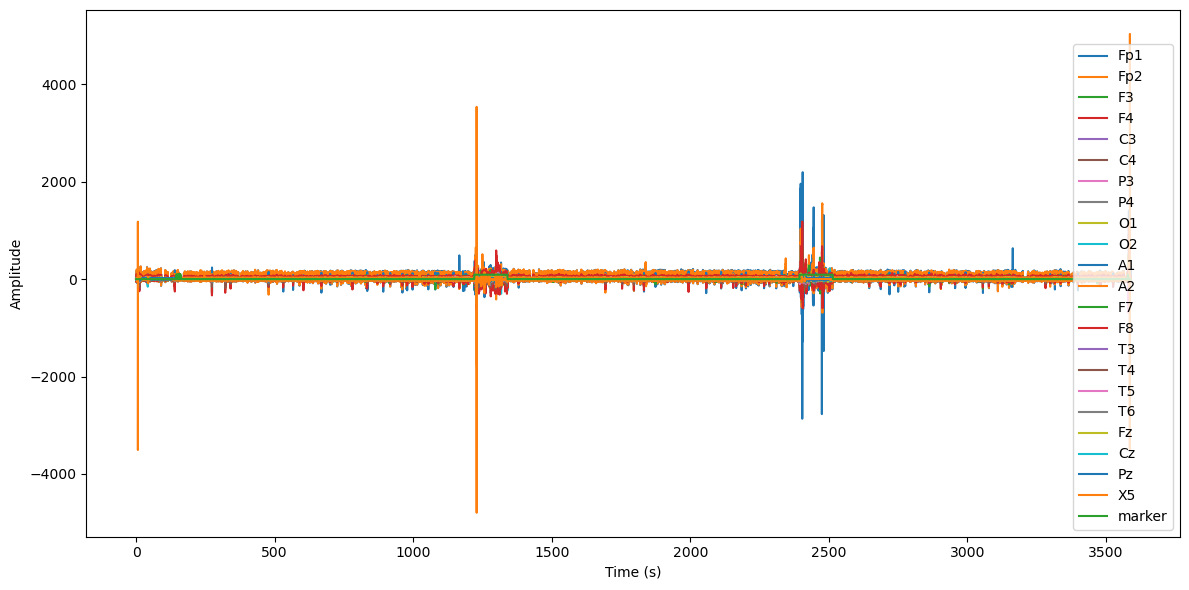

In [129]:
u.plot_eeg_signals(eeg_data, first_sample=1000,freq=metadata["sampling_freq"][0])

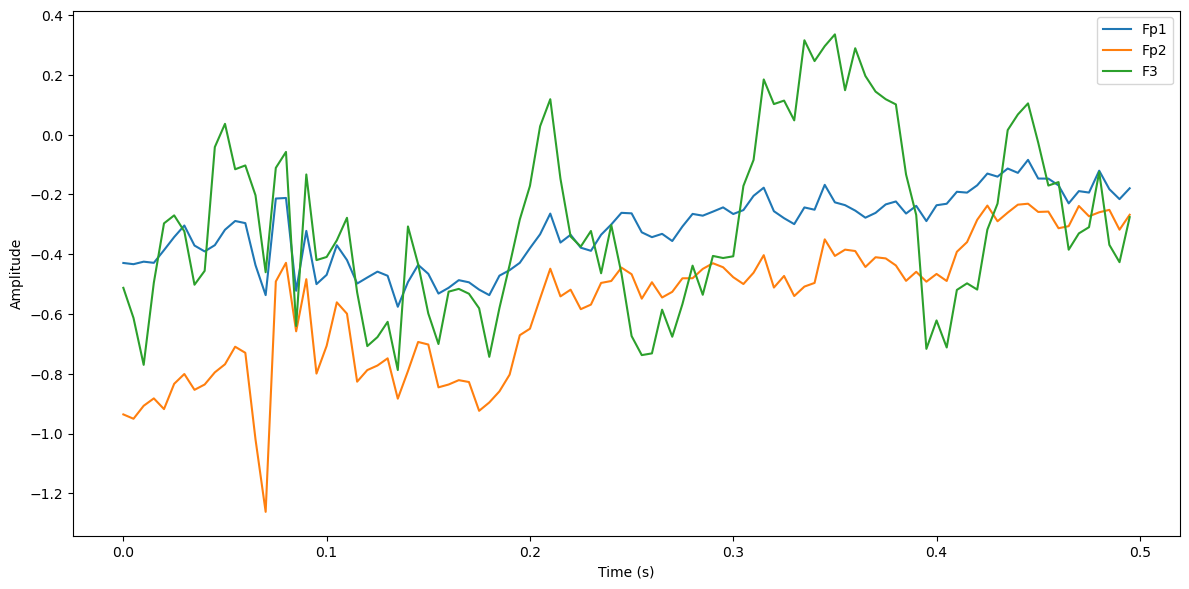

In [125]:
eeg_data_normalized = p.normalize_eeg(eeg_data)
u.plot_eeg_signals(eeg_data_normalized, first_sample=1000, window_size=100,freq=metadata["sampling_freq"][0], channels=['Fp1', 'Fp2', 'F3'])

Processing channels: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'A1', 'A2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz', 'X5', 'marker']
Channel Fp1 → likely line noise: 43.75 Hz


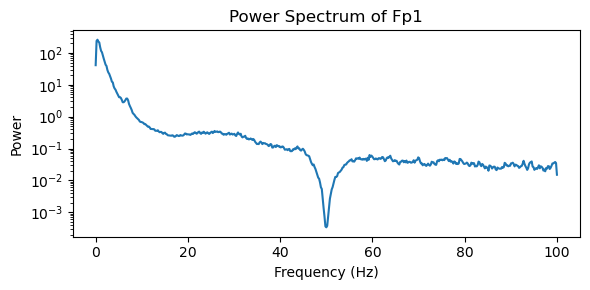

Channel Fp2 → likely line noise: 40.62 Hz


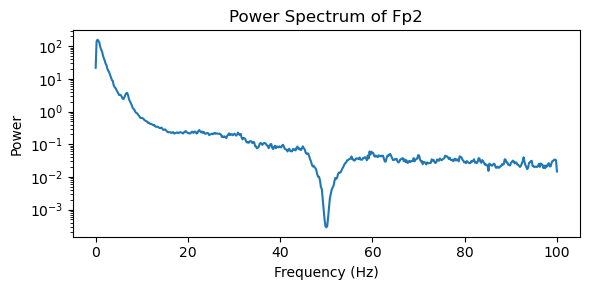

Channel F3 → likely line noise: 41.60 Hz


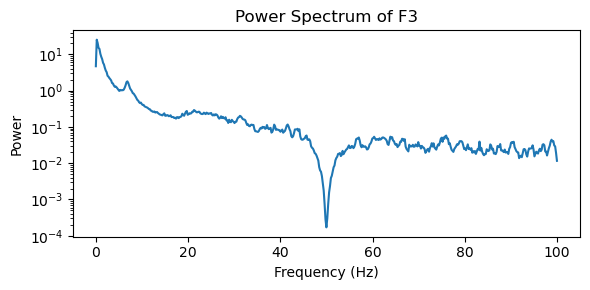

Channel F4 → likely line noise: 40.62 Hz


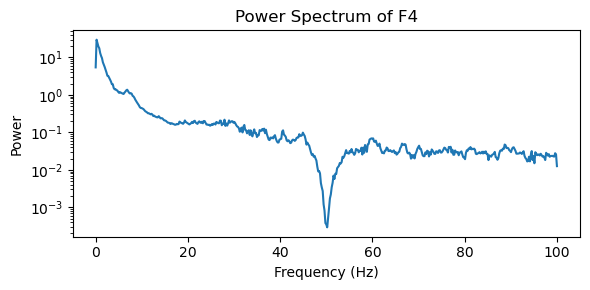

Channel C3 → likely line noise: 44.92 Hz


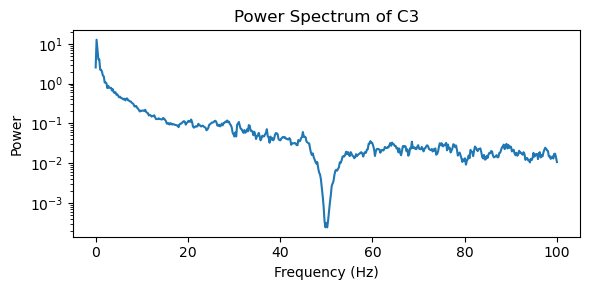

Channel C4 → likely line noise: 44.92 Hz


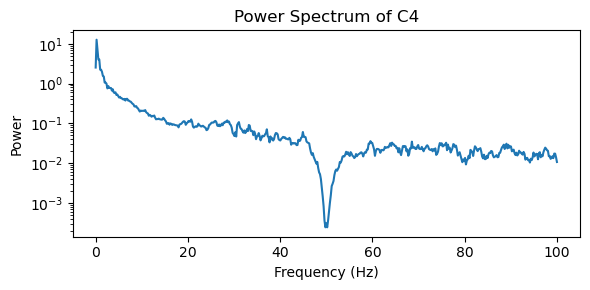

Channel P3 → likely line noise: 41.99 Hz


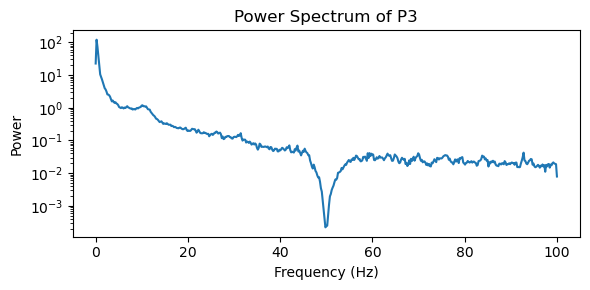

Channel P4 → likely line noise: 41.21 Hz


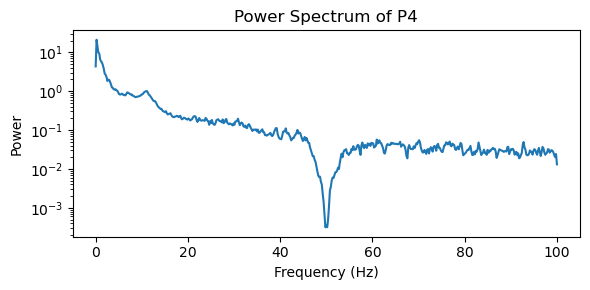

Channel O1 → likely line noise: 41.99 Hz


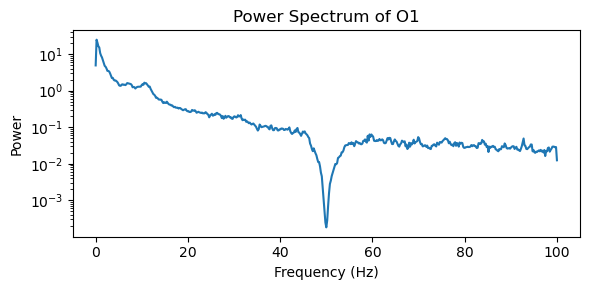

Channel O2 → likely line noise: 43.75 Hz


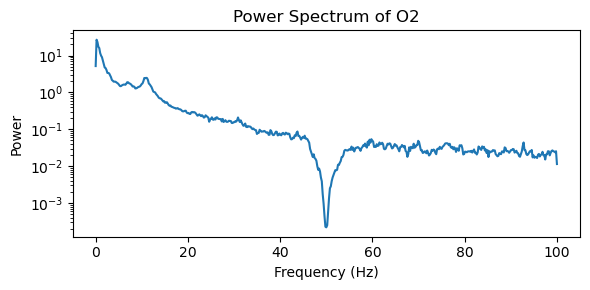

Channel A1 → likely line noise: 40.62 Hz


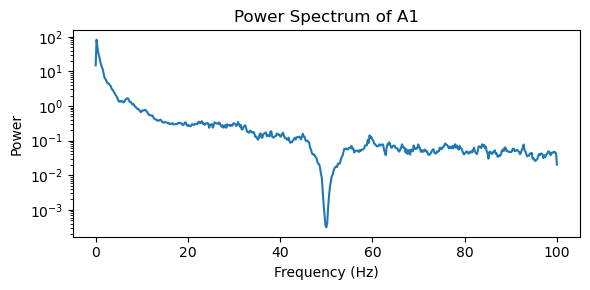

Channel A2 → likely line noise: 40.04 Hz


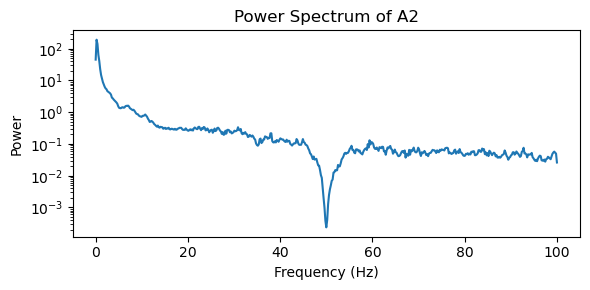

Channel F7 → likely line noise: 40.62 Hz


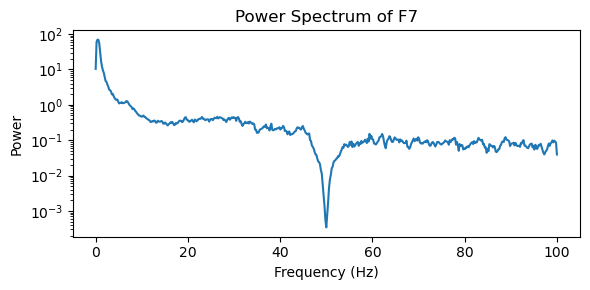

Channel F8 → likely line noise: 40.43 Hz


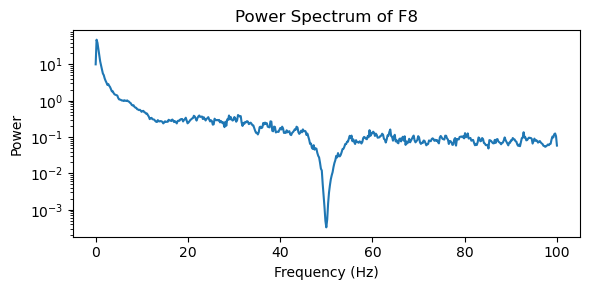

Channel T3 → likely line noise: 41.21 Hz


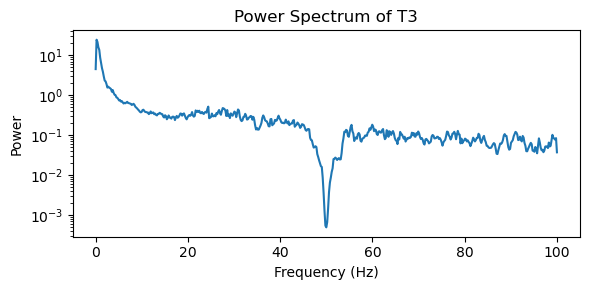

Channel T4 → likely line noise: 40.62 Hz


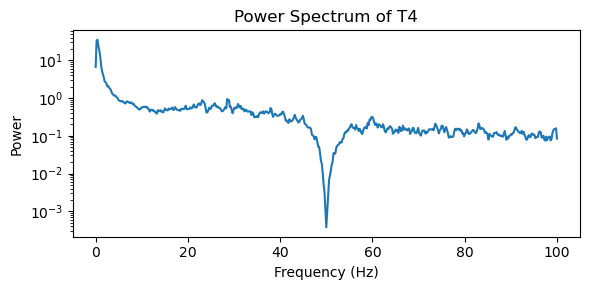

Channel T5 → likely line noise: 41.21 Hz


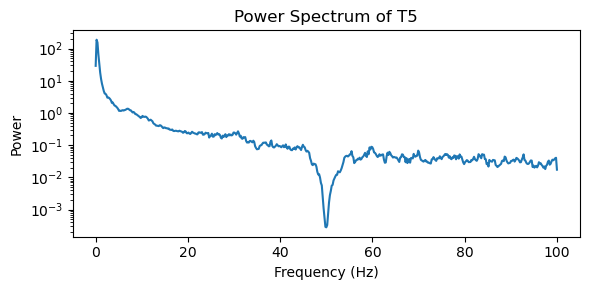

Channel T6 → likely line noise: 44.92 Hz


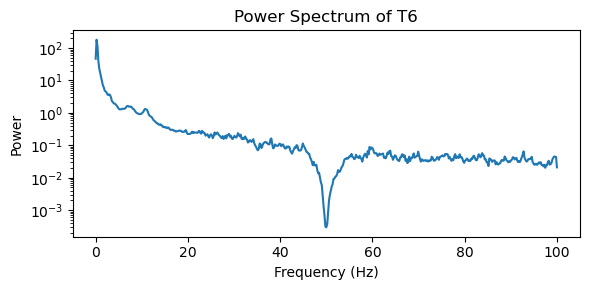

Channel Fz → likely line noise: 40.62 Hz


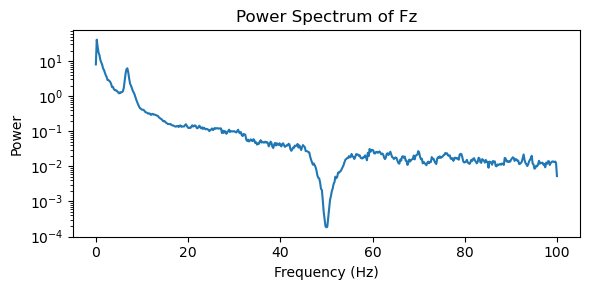

Channel Cz → likely line noise: 41.80 Hz


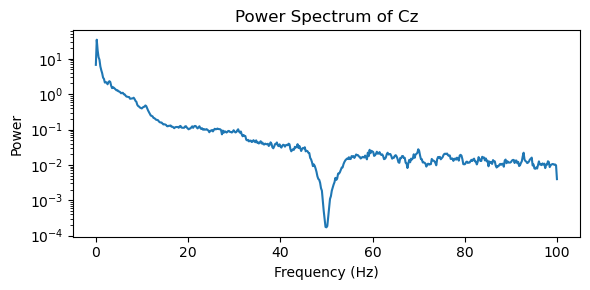

Channel Pz → likely line noise: 43.75 Hz


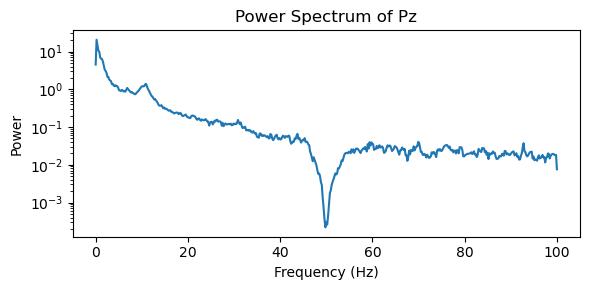

Channel X5 → likely line noise: 41.02 Hz


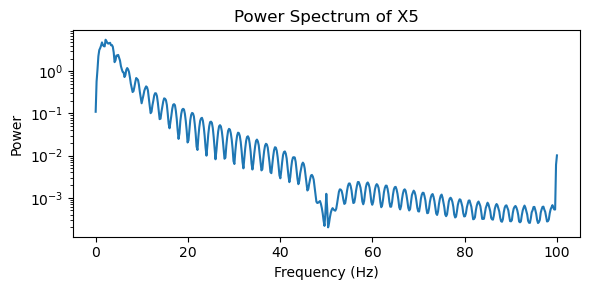

Channel marker → likely line noise: 40.43 Hz


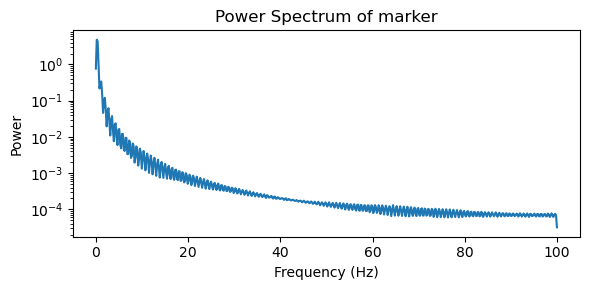

In [147]:
u.power_spectrum(eeg_data, fs=metadata["sampling_freq"][0])

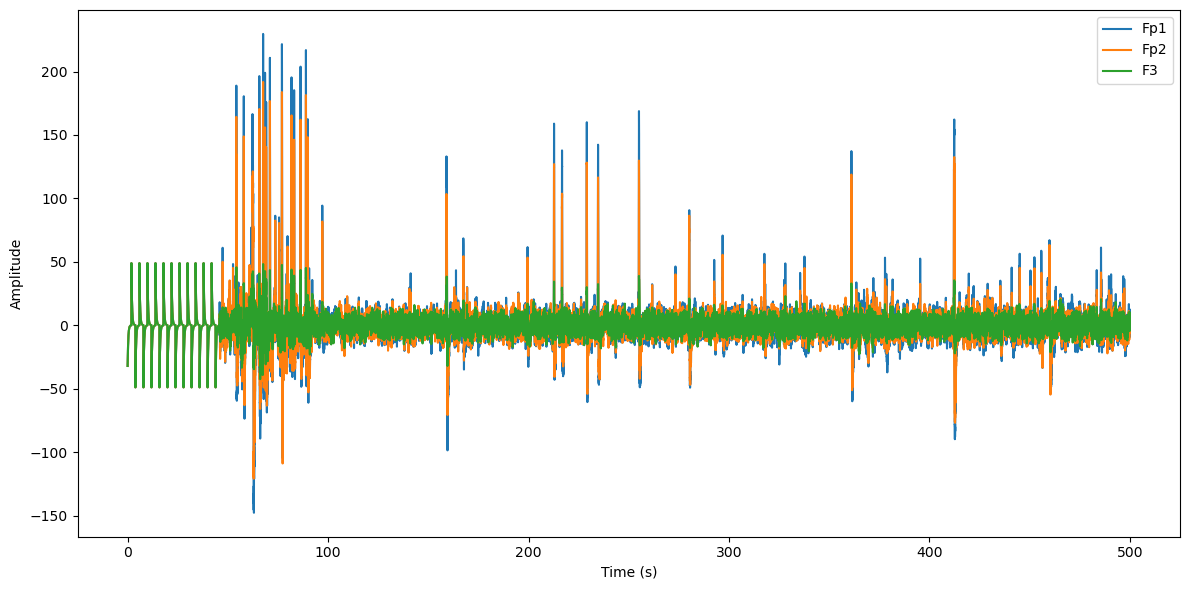

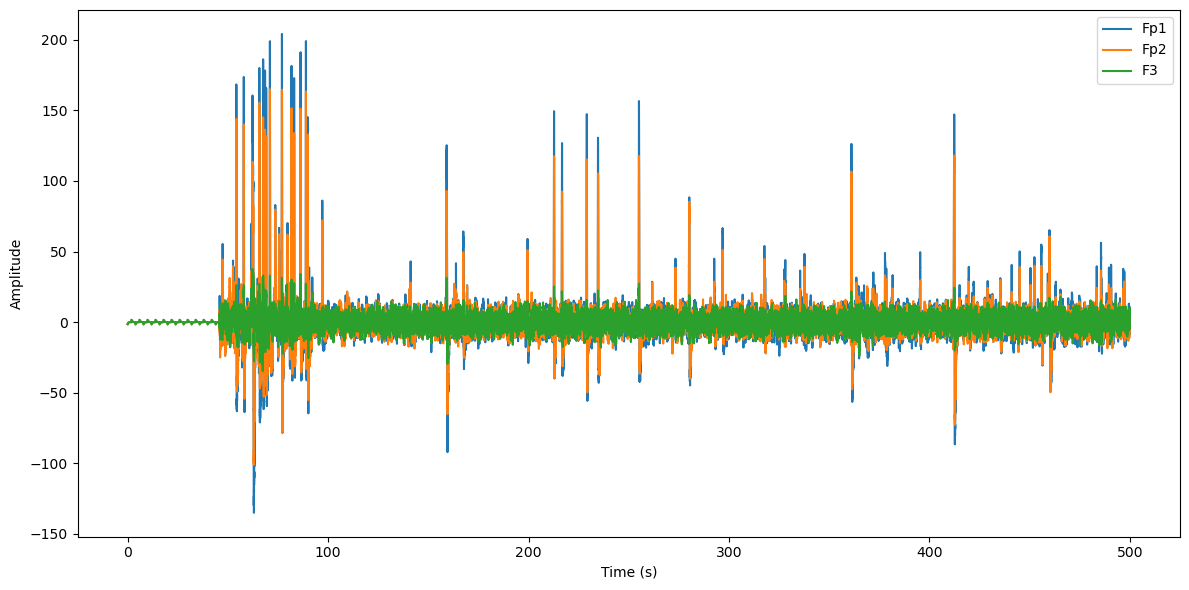

In [166]:
rr=p.robust_reference(eeg_data)
u.plot_eeg_signals(eeg_data, first_sample=1000, window_size=100000,freq=metadata["sampling_freq"][0], channels=['Fp1', 'Fp2', 'F3'])
u.plot_eeg_signals(rr[0], first_sample=1000, window_size=100000,freq=metadata["sampling_freq"][0], channels=['Fp1', 'Fp2', 'F3'])